<a href="https://colab.research.google.com/github/PuChan-HCI/myweb/blob/main/MediaSystem/ImageProcessing06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前準備 (Preparation)

### 画像のアップロード

In [3]:
import urllib.request
url = 'https://raw.githubusercontent.com/PuChan-HCI/myweb/main/MediaSystem/woman.jpg'
file_name = 'woman.jpg'
urllib.request.urlretrieve(url, file_name)

('woman.jpg', <http.client.HTTPMessage at 0x7d74307d73d0>)

### 画像の表示（カラーとグレースケール）(Display the image in color & grayscale)

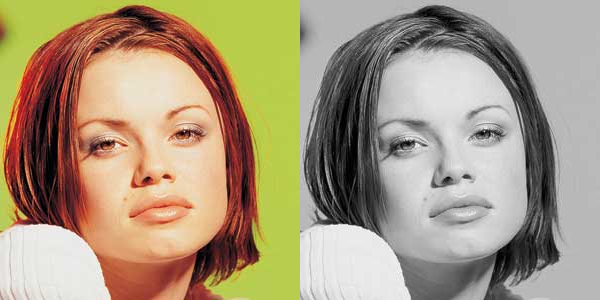

In [4]:
import cv2
from google.colab.patches import cv2_imshow # for image display
orig = cv2.imread(file_name)
src = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
combined_image = cv2.hconcat([orig, cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)])
cv2_imshow(combined_image)

# 画像の特殊効果 (Effects)

### ハイコントラスト (High Contrast)

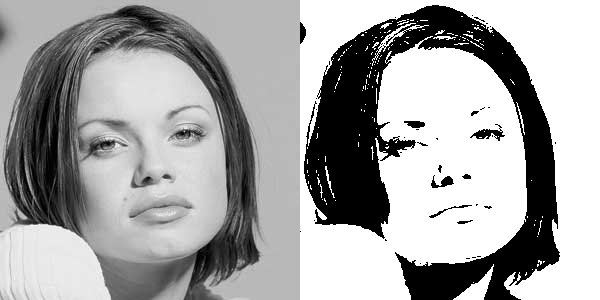

In [5]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

src = cv2.imread(file_name,0)
th, high = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(cv2.hconcat([src, high]))

### ポスタリゼーション (Posterization)

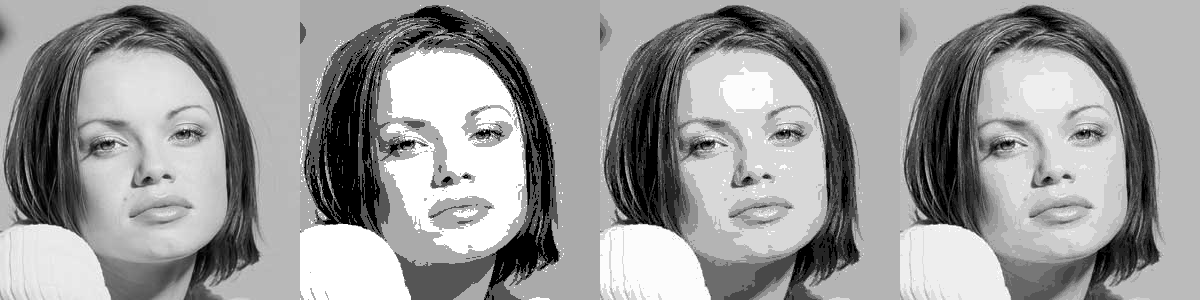

In [6]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def make_post_lut(n):
  """
  ポスタリゼーション用のLUTを作成
  """
  x = np.arange(256)
  y = np.floor(x/n)*int(255/np.floor(255/n))
  y = y.astype('uint8')
  return y

if __name__ == "__main__":
  image = cv2.imread(file_name)
  src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  combined_image = src.copy()
  c = [64, 32, 16]
  x = np.arange(256)
  for i in range(3):
    y = make_post_lut(c[i])
    img_lut = cv2.LUT(src, y)
    combined_image = cv2.hconcat([combined_image, img_lut])
  cv2_imshow(combined_image)

### ネガ（濃淡の反転）(Invert)

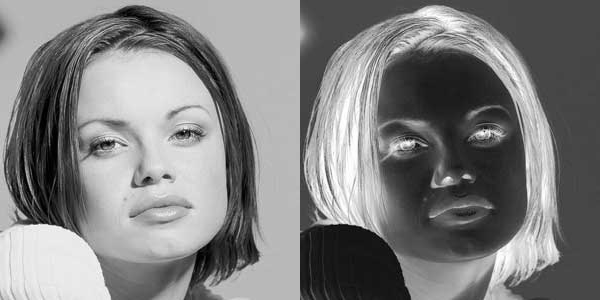

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def nega_convert(input_img):
  # LUT（Look Up Table）の作成
  lut = np.zeros((256, 1), dtype = 'uint8')
  for i in range(256):
    lut[i][0] = 255 - i
  # LUTの適用
  nega_img = cv2.LUT(input_img, lut)
  return nega_img

if __name__ == "__main__":
  image = cv2.imread(file_name)
  src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  nega_img = nega_convert(src)
  combined_image = cv2.hconcat([src, nega_img])
  cv2_imshow(combined_image)

### ソラリゼーション (Solarization)

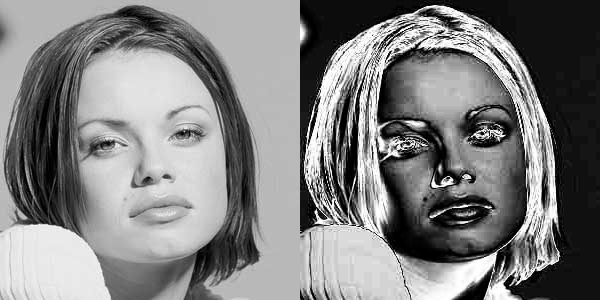

In [7]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def make_post_lut(n):
  """
  ポスタリゼーション用のLUTを作成
  """
  x = np.arange(256)
  y = np.floor(x/n)*int(255/np.floor(255/n))
  y = y.astype('uint8')
  return y

if __name__ == "__main__":
  image = cv2.imread(file_name)
  src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # ソラリゼーション用のLUTを適当に作成
  x = np.arange(256)
  y = ((np.sin(3 * np.pi * (x / 255 + 1 / 2 )) + 1) * 255 / 2).astype('uint8')
  img_lut = cv2.LUT(src, y)

  cv2_imshow(cv2.hconcat([src, img_lut]))

### エンボス (Emboss)

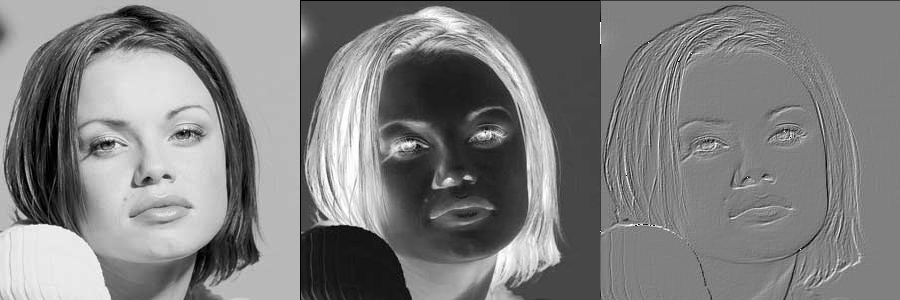

In [9]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def nega_convert(input_img):
  # LUT（Look Up Table）の作成
  lut = np.zeros((256, 1), dtype = 'uint8')
  for i in range(256):
    lut[i][0] = 255 - i
  # LUTの適用
  nega_img = cv2.LUT(input_img, lut)
  return nega_img

def move_img(input_img, mv_x, mv_y):
  # 画像の大きさを取得
  width = input_img.shape[0]
  height = input_img.shape[1]

  # 移動用の行列の作成
  mat = np.float32([[1, 0, mv_x], [0, 1, mv_y]])
  # 移動の実行
  mv_img = cv2.warpAffine(input_img, mat, (height, width))

  return mv_img

def add_img(gray_img, mv_img):
  # 画像の合成 127を引くのは凹凸をめだたせるため
  emboss_img = (gray_img + mv_img) - 127
  # 0から255の範囲に値をおさめる
  emboss_img = emboss_img.clip(0, 255)

  return emboss_img

if __name__ == "__main__":
  image = cv2.imread(file_name)
  src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  nega_img = nega_convert(src)
  nega_img_shift = move_img(nega_img,1,1)
  emboss = add_img(src, nega_img_shift)
  combined_image = cv2.hconcat([src, nega_img_shift])
  combined_image = cv2.hconcat([combined_image, emboss])
  cv2_imshow(combined_image)

### モザイク (Mosaic)

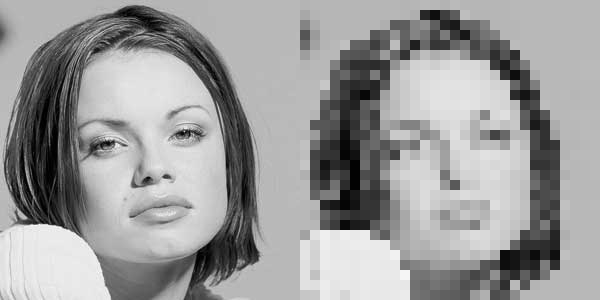

In [10]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

def mosaic(img, scale=0.1):
  h, w = img.shape[:2]  # 画像の大きさ

  # 画像を scale (0 < scale <= 1) 倍に縮小する。
  dst = cv2.resize(img, dsize=None, fx=scale, fy=scale, interpolation=cv2.INTER_NEAREST)

  # 元の大きさに拡大する。
  dst = cv2.resize(dst, dsize=(w, h), interpolation=cv2.INTER_NEAREST)

  return dst


if __name__ == "__main__":
  image = cv2.imread(file_name)
  src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  mosaic_img = mosaic(src)
  combined_image = cv2.hconcat([src, mosaic_img])
  cv2_imshow(combined_image)

### ぼかし (Blur)

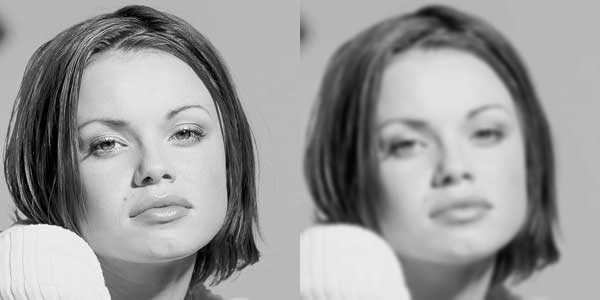

In [11]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display

image = cv2.imread(file_name)
src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# ガウシアンフィルタ
img_gafilter = cv2.GaussianBlur(src,     # 入力画像
                                (9,9),    # カーネルの縦幅・横幅
                                2        # 横方向の標準偏差（0を指定すると、カーネルサイズから自動計算）
                                )
combined_image = cv2.hconcat([src, img_gafilter])
cv2_imshow(combined_image)